In [1]:
from typing import List, Tuple
from random import choice, randint
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
class Crossing:
    index: int
    n_streets: int
    streets: List[int]
    green_street: int
        
    def __init__(self, index: int):
        self.index = index
        
        self.n_streets = 0
        self.streets = []
        self.green_street = 0
        
    def add_street(self, street: int):
        self.n_streets += 1
        self.streets.append(street)
        self.green_street = street
        
    def update(self):
        index = self.streets.index(self.green_street) + 1
        
        if index == self.n_streets:
            index = 0
            
        self.green_street = self.streets[index]
        
    def __str__(self):
        text = f'index: {self.index}. n_streets: {self.n_streets}. streets: {self.streets}. green_street: {self.green_street}.'
        
        return text

In [3]:
class Street:
    index: int
    size: int
    crossings: Tuple[int, int]
    capacities: Tuple[int, int]
    populations: List[int]
        
    def __init__(self, index: int, size: int, crossings: Tuple[int, int], capacities: Tuple[int, int]):
        self.index = index
        self.size = size
        self.crossings = crossings
        self.capacities = capacities
        
        self.populations = [0, 0]

    def __str__(self):
        text = f'index: {self.index}. size: {self.size}. crossings: {self.crossings}. capacities: {self.capacities}. populations: {self.populations}'
        
        return text
    
    def add_car(self, car: int, direction: int):
        self.populations[direction] += 1

In [4]:
class Car:
    index: int
    on_street: int
    direction: int
    position: int
    velocity: int
    odometer: int
        
    def __init__(self, index: int, on_street: int, direction: int, position: int, velocity: int):
        self.index = index
        self.on_street = on_street
        self.direction = direction
        self.position = position
        self.velocity = velocity
        self.odometer = 0
        
    def update(self, crossings: List[Crossing], streets: List[Street]):
        street = streets[self.on_street]
        
        if self.position >= street.size:
            on_crossing = street.crossings[self.direction]  
            crossing = crossings[on_crossing]
            
            if crossing.green_street == self.on_street:
                options = [street for street in crossing.streets if street != self.on_street]
                print(options)
                new_on_street = choice(options)
                new_street = streets[new_on_street]
                new_direction = 1 if new_street.crossings[0] == on_crossing else 0
                
                if new_street.populations[new_direction] < new_street.capacities[new_direction]:
                    street.populations[self.direction] -= 1
                    new_street.populations[new_direction] += 1
                    
                    self.on_street = new_on_street
                    self.direction = new_direction
                    self.position = 0
                    self.velocty = 10
                    
        else:
            self.position += self.velocity
            self.odometer += self.velocity
        
    def __str__(self):
        text = f'index: {self.index}. on_street: {self.on_street}. direction: {self.direction}. position: {self.position}. velocity: {self.velocity}. odometer: {self.odometer}.'
        
        return text

In [5]:
class City:
    graph: nx.classes.graph.Graph
    crossings: List[Crossing] 
    streets: List[Street]
    n_cars: int
    cars: List[Car]
        
    def __init__(self):
        self.crossings = [] 
        self.streets = []
        self.n_cars = 0
        self.cars = []        
        
    def load_graph(self, graph: nx.classes.graph.Graph):
        self.graph = graph
        
        for index in graph.nodes():
            crossing = Crossing(index)
            self.crossings.append(crossing)
            
            nx.set_node_attributes(self.graph, {index: index}, name='index')
        
        for index, (left_crossing, right_crossing, data) in enumerate(graph.edges(data=True)):
            street = Street(index, data['size'], (left_crossing, right_crossing), (2, 2))
            self.streets.append(street)
            
            self.crossings[left_crossing].add_street(index)
            self.crossings[right_crossing].add_street(index)
            
            nx.set_edge_attributes(self.graph, {(left_crossing, right_crossing): index}, name='index')
        
        street = Street(-1, 0, (-1, 0), (None, None))
        self.streets.append(street)
        self.crossings[0].add_street(-1)
        self.graph.add_edge(-1, 0, index = -1)
        
    def add_car(self):
        car = Car(self.n_cars, -1, 1, 0, 10)
        self.n_cars += 1
        self.cars.append(car)
        self.streets[-1].add_car(car.index, 1)
        
    def update(self):
        for crossing in self.crossings:
            crossing.update()
        
        for car in self.cars:
            car.update(self.crossings, self.streets)
            
    def __str__(self):
        text = ('\n'.join(str(crossing) for crossing in self.crossings) + '\n\n'
                + '\n'.join(str(street) for street in self.streets) + '\n\n'
                + '\n'.join(str(car) for car in self.cars))
        
        return text

    def draw(self):
        pos = nx.spring_layout(self.graph)
        nx.draw(self.graph, pos)
        node_labels = nx.get_node_attributes(self.graph,'index')
        nx.draw_networkx_labels(self.graph, pos, node_labels)
        edge_labels = nx.get_edge_attributes(self.graph,'index')
        nx.draw_networkx_edge_labels(self.graph, pos, edge_labels)
        plt.show()

In [19]:
from networkx.generators.random_graphs import erdos_renyi_graph
n = 5
p = 0.75
g = erdos_renyi_graph(n, p)
for (u,v,w) in g.edges(data=True):
    w['size'] = randint(10,20)

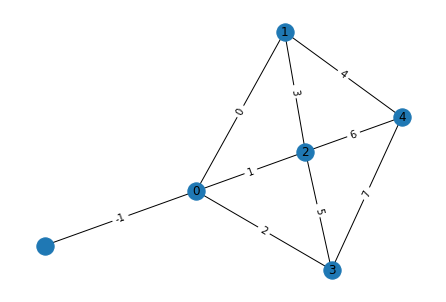

In [20]:
city = City()
city.load_graph(g)
city.draw()

In [21]:
city.add_car()

In [22]:
print(city)

index: 0. n_streets: 4. streets: [0, 1, 2, -1]. green_street: -1.
index: 1. n_streets: 3. streets: [0, 3, 4]. green_street: 4.
index: 2. n_streets: 4. streets: [1, 3, 5, 6]. green_street: 6.
index: 3. n_streets: 3. streets: [2, 5, 7]. green_street: 7.
index: 4. n_streets: 3. streets: [4, 6, 7]. green_street: 7.

index: 0. size: 13. crossings: (0, 1). capacities: (2, 2). populations: [0, 0]
index: 1. size: 11. crossings: (0, 2). capacities: (2, 2). populations: [0, 0]
index: 2. size: 11. crossings: (0, 3). capacities: (2, 2). populations: [0, 0]
index: 3. size: 14. crossings: (1, 2). capacities: (2, 2). populations: [0, 0]
index: 4. size: 13. crossings: (1, 4). capacities: (2, 2). populations: [0, 0]
index: 5. size: 12. crossings: (2, 3). capacities: (2, 2). populations: [0, 0]
index: 6. size: 18. crossings: (2, 4). capacities: (2, 2). populations: [0, 0]
index: 7. size: 19. crossings: (3, 4). capacities: (2, 2). populations: [0, 0]
index: -1. size: 0. crossings: (-1, 0). capacities: (N

In [33]:
city.update()
print(city)

(2, 3) 0 2 2
[1, 3, 6]
index: 0. n_streets: 4. streets: [0, 1, 2, -1]. green_street: 2.
index: 1. n_streets: 3. streets: [0, 3, 4]. green_street: 3.
index: 2. n_streets: 4. streets: [1, 3, 5, 6]. green_street: 5.
index: 3. n_streets: 3. streets: [2, 5, 7]. green_street: 5.
index: 4. n_streets: 3. streets: [4, 6, 7]. green_street: 6.

index: 0. size: 13. crossings: (0, 1). capacities: (2, 2). populations: [0, 0]
index: 1. size: 11. crossings: (0, 2). capacities: (2, 2). populations: [0, 0]
index: 2. size: 11. crossings: (0, 3). capacities: (2, 2). populations: [0, 0]
index: 3. size: 14. crossings: (1, 2). capacities: (2, 2). populations: [1, 0]
index: 4. size: 13. crossings: (1, 4). capacities: (2, 2). populations: [0, 0]
index: 5. size: 12. crossings: (2, 3). capacities: (2, 2). populations: [0, 0]
index: 6. size: 18. crossings: (2, 4). capacities: (2, 2). populations: [0, 0]
index: 7. size: 19. crossings: (3, 4). capacities: (2, 2). populations: [0, 0]
index: -1. size: 0. crossings: (